In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


##Função de redimencionar imagens

In [0]:
def redimensionaImagem(image, tamanho):
    altura, largura, _ = image.shape
    return cv2.resize(image, (int(altura * tamanho), int(largura * tamanho)))

##Carregando imagem e logo

In [0]:
#caregando o logo

logo = cv2.imread("logo.png")
logo = redimensionaImagem(logo, 0.25)

#carregando a imagem

img = cv2.imread("klysman.jpg")
img = redimensionaImagem(img, 0.8)

##Marcando a posição na onde a logo será inserida

In [9]:
alturaLogo, larguraLogo, _ = logo.shape
regiaoOndeFicaraOLogo = img[0:altura, 0:largura]

NameError: ignored

##Convertando a logo em preto e branco (Mascara)

In [0]:
logoPretoEBranco = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

#limiarização/binarizacao do logo

_, logoBinarizado = cv2.threshold(logoPretoEBranco, 150, 255, cv2.THRESH_BINARY_INV)

##Exibindo as imagens

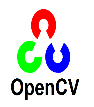

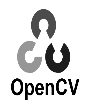

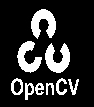

In [12]:
cv2_imshow(logo)
cv2_imshow(logoPretoEBranco)
cv2_imshow(logoBinarizado)